In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService



In [2]:
qc = QuantumCircuit(2)

qc.h(0) #hadamard

qc.cx(0,1) #cntrolled X, by 0 fir 1

qc.draw("mpl")

observables_lables = ["IZ","IX", "ZI", "XI", "ZZ","XX"]
observables = [SparsePauliOp(label) for label in observables_lables]

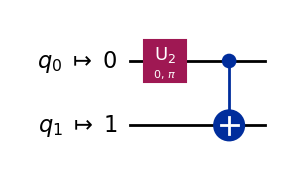

In [3]:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

backend = FakeAlmadenV2()
estimator = Estimator(backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level = 1 )

isa_circuit = pm.run(qc)

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()

pub_result = result[0]

isa_circuit.draw('mpl', idle_wires=False)



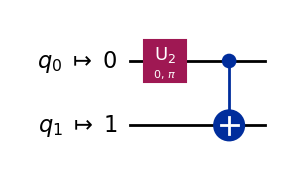

In [4]:
isa_circuit.draw('mpl', idle_wires=False)

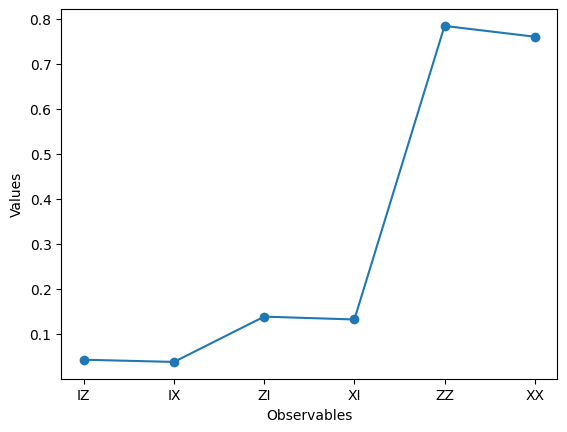

In [5]:
from matplotlib import pyplot as plt
values = pub_result.data.evs
errors = pub_result.data.stds

plt.plot(observables_lables, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

In [6]:
from qiskit import QuantumCircuit

def get_qc_for_n_qubit_GHZ_state(n):
    
    if isinstance(n, int) and n>=2:
        qc = QuantumCircuit(n)
        qc.h(0)
        for i in range(n-1):
            qc.cx(i, i+1)
    else:
        raise Exception(f'{n} is not a valid input. It is a {type(n)}')
    return qc

n = 20
qc = get_qc_for_n_qubit_GHZ_state(n)

In [7]:
operator_string = ['Z' + 'I'*i +'Z'+'I'*(n-2-i) for i in range(n-1)]

operators = [SparsePauliOp(operator) for operator in operator_string]
print(len(operators))

19


In [8]:
backend = FakeAlmadenV2()
pm= generate_preset_pass_manager(backend=backend, optimization_level=1)

isa_circuit = pm.run(qc)
isa_operators_list=[op.apply_layout(isa_circuit.layout) for op in operators]

In [9]:
from qiskit_ibm_runtime import EstimatorOptions
from qiskit_ibm_runtime import EstimatorV2 as Estimator

options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

estimator = Estimator(backend, options=options)

In [10]:
job = estimator.run([(isa_circuit, isa_operators_list)])


c:\Users\torbjsme\Master\QAOA\myenv\lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:186: UserWarning: The resilience_level option has no effect in local testing mode.
  warnings.warn("The resilience_level option has no effect in local testing mode.")
c:\Users\torbjsme\Master\QAOA\myenv\lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:233: UserWarning: Options {'dynamical_decoupling': {'enable': True, 'sequence_type': 'XY4'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


In [ ]:
data = list(range(1,len(operators)+1)) #distance between Z operators
result = job.result()[0]
values = result.data.evs #expectation values at each Z operator
valyes = [v/values[0] for v in values] #normalize expecation values to see how they decay w distance


label = str(n) + "-qubit GHZ state"
plt.plot(data,values,marker='o', label= label)
plt.xlabel('Distance between qubits $i$')
plt.ylabel(r'$+langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $')
plt.legend
plt.show()

In [1]:
import numpy as np
import timeit

A = np.random.rand(1000, 1000)
B = np.random.rand(1000, 1000)

# Time using @ operator
time_at = timeit.timeit('A @ B', globals=globals(), number=100)

# Time using np.matmul()
time_matmul = timeit.timeit('np.matmul(A, B)', globals=globals(), number=100)

# Time using np.dot()
time_dot = timeit.timeit('np.dot(A, B)', globals=globals(), number=100)

print(f"@ operator: {time_at:.5f}s")
print(f"np.matmul: {time_matmul:.5f}s")
print(f"np.dot: {time_dot:.5f}s")

@ operator: 1.44283s
np.matmul: 1.44604s
np.dot: 1.14211s


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_9304\91555750.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  edge_list = [edge+(float(rng.uniform(0,1,1)),) for edge in graph.edges]


TypeError: 'list' object is not callable

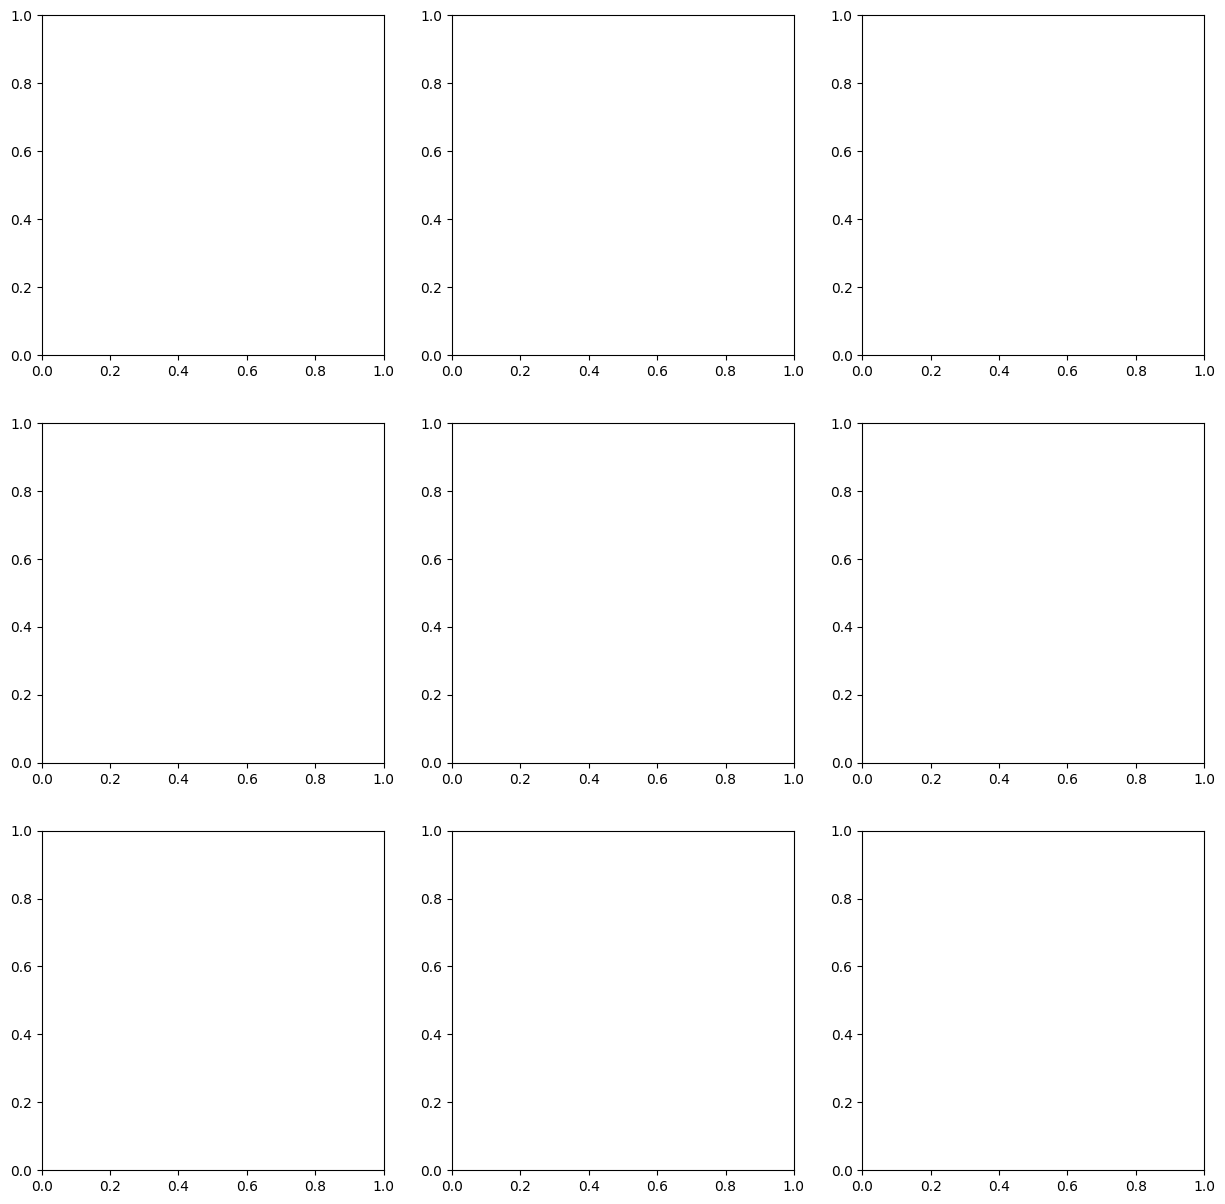

In [4]:
import rustworkx as rx
from rustworkx import is_connected
from rustworkx.visualization import mpl_draw as draw_graph
import networkx as nx
from matplotlib import pyplot as plt

def read_graph6(graph6_str):

    graph = rx.PyGraph.from_graph6(graph6_str)
    draw_graph(graph)
def read_graph6_with_networkx(graph6_str):
    graph = nx.from_graph6_bytes(graph6_str.encode())
    nx.draw(graph, with_labels=True)
    plt.show()
def convert_nx_to_pygraph(nx_graph):
    pygraph = rx.PyGraph()
    pygraph.add_nodes_from(range(nx_graph.number_of_nodes()))
    pygraph.add_edges_from((u, v) for u, v in nx_graph.edges())
    return pygraph


#read_graph6_with_networkx('HCQuRz{')

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

graph6_strings = [
    'HCQuRz{', 'HCpdbZn', 'HCrer^N', 'HCrerj\\', 'HQhVTpV', 'H?rnff}', 
    'H?otPt}', 'H?`vVZe', 'H?`eNFy'
]
rng = np.random.default_rng()

for ax, graph6_str in zip(axes.flatten(), graph6_strings):
    graph = nx.from_graph6_bytes(graph6_str.encode())
    edge_list = [edge+(float(rng.uniform(0,1,1)),) for edge in graph.edges]
    graph.edges = edge_list
    nx.draw(graph, with_labels=True, ax=ax)
    ax.set_title(graph6_str)

plt.tight_layout()
plt.show()

In [ ]:
from QAOA import QAOArunner
from MaxCutProblem import MaxCutProblem
import params
from rustworkx.visualization import mpl_draw as draw_graph
from load_data import load_graph_from_csv

Objective to maximize: -2x_0*x_1-2x_0*x_2-2x_0*x_4-2x_0*x_7-2x_1*x_4-2x_1*x_9-2x_2*x_3-2x_2*x_4-2x_2*x_6-2x_3*x_5-2x_3*x_6-2x_5*x_6-2x_7*x_8-2x_7*x_9-2x_8*x_10-2x_9*x_10+4x_0+3x_1+4x_2+3x_3+3x_4+2x_5+3x_6+3x_7+2x_8+3x_9+2x_10 for relaxed = True
13.999999999880231 [1.6440643132405547e-12, 0.999999999999123, 0.9999999999993702, 4.340621644921728e-12, 3.8496675221069805e-12, 0.9999999999987257, 4.340621644915111e-12, 0.9999999999976982, 1.5541692956384466e-11, 1.7094927301720536e-12, 0.9999999999734333]
Optimization terminated successfully.
         Current function value: -13.999999895892559
         Iterations: 5
         Function evaluations: 1341
Objective value: 14.000000, Bitstring: ['0.0000', '1.0000', '1.0000', '0.0000', '0.0000', '1.0000', '0.0000', '1.0000', '0.0000', '0.0000', '1.0000']


: 

In [5]:
import os
print('Number of CPUs in the system: {}'.format(os.cpu_count()))

Number of CPUs in the system: 16
